# Data Preparation

In [1]:
#import libraries
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

import copy 

import warnings
warnings.filterwarnings('ignore')

##### We will be using the NYPD data to compare pre-covid vs post-covid crime in New York City.

In [2]:
#import NYPD Arrest Data
arrest = pd.read_csv('Data/NYPD_data/NYPD_Arrest_Data.csv')
arrest.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,234188790,09/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)


In [3]:
#check arrest info
arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                155507 non-null  int64  
 1   ARREST_DATE               155507 non-null  object 
 2   PD_CD                     155478 non-null  float64
 3   PD_DESC                   155404 non-null  object 
 4   KY_CD                     155404 non-null  float64
 5   OFNS_DESC                 155404 non-null  object 
 6   LAW_CODE                  155507 non-null  object 
 7   LAW_CAT_CD                154114 non-null  object 
 8   ARREST_BORO               155507 non-null  object 
 9   ARREST_PRECINCT           155507 non-null  int64  
 10  JURISDICTION_CODE         155507 non-null  int64  
 11  AGE_GROUP                 155507 non-null  object 
 12  PERP_SEX                  155507 non-null  object 
 13  PERP_RACE                 155507 non-null  o

##### First I am going to take the Arrest_Date column and turn it from a object to a datetime. Then I am going to create four new columns: Year, Month, Week Number and Day of week.

In [4]:
#Step one convert into datetime
arrest['ARREST_DATE'] = pd.to_datetime(arrest['ARREST_DATE']) #turn into datetime64[ns] object

#extract year, month, week and weekday (Monday = 0, Sunday = 6)
arrest['Year'] = arrest['ARREST_DATE'].dt.year
arrest['Month'] = arrest['ARREST_DATE'].dt.month
arrest['WeekDay'] = arrest['ARREST_DATE'].dt.weekday
arrest['Week'] = arrest['ARREST_DATE'].dt.isocalendar().week

#View dataframe
arrest.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Year,Month,WeekDay,Week
0,238013474,2021-12-18,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,...,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002),2021,12,5,50
1,236943583,2021-11-25,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,...,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007),2021,11,3,47
2,234938876,2021-10-14,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,...,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005),2021,10,3,41
3,234788259,2021-10-11,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,...,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008),2021,10,0,41
4,234188790,2021-09-28,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,...,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004),2021,9,1,39


In [5]:
#count number of arrests per year
arrest.Year.value_counts()

2021    155507
Name: Year, dtype: int64

##### We only have 2021 data! Will need to get historical data as well then merge the dataframes

In [6]:
arrest_historic = pd.read_csv('Data/NYPD_data/NYPD_Arrests_Data_Historic.csv')
arrest_historic.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,...,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045),13093.0,7.0,4.0,36.0,16.0
2,193260691,02/06/2019,NaN,NaN,NaN,NaN,PL 2203400,F,M,14,...,986685.0,215375.0,40.757839,-73.991212,POINT (-73.99121211099998 40.75783900300007),13094.0,12.0,4.0,10.0,8.0
3,149117452,01/06/2016,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,...,998032.0,175598.0,40.648650,-73.950336,POINT (-73.95033556299995 40.648650085000035),13510.0,61.0,2.0,11.0,40.0
4,190049060,11/15/2018,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,...,1003606.0,185050.0,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008),17615.0,16.0,2.0,49.0,49.0


In [7]:
#convert arrest date to datetime
arrest_historic['ARREST_DATE'] = pd.to_datetime(arrest_historic['ARREST_DATE'])

#extract year, month, week and weekday (Monday = 0, Sunday = 6)
arrest_historic['Year'] = arrest_historic['ARREST_DATE'].dt.year
arrest_historic['Month'] = arrest_historic['ARREST_DATE'].dt.month
arrest_historic['WeekDay'] = arrest_historic['ARREST_DATE'].dt.weekday
arrest_historic['Week'] = arrest_historic['ARREST_DATE'].dt.isocalendar().week

#count number of arrests per year
arrest_historic.Year.value_counts()

2010    422322
2009    421316
2011    412859
2007    403231
2008    401529
2012    396280
2013    393809
2014    387727
2006    371934
2015    339470
2016    314864
2017    286225
2018    246773
2019    214617
2020    140413
Name: Year, dtype: int64

##### I only want to focus on years 2018, 2019, 2020 and 2021. So Select for those years then merge both dataframes

In [8]:
#Select only years 2018 and above
arrest_historic = arrest_historic.loc[arrest_historic['Year'] >= 2018]

#before combining rename the Lon_Lat column to New Georeferenced Column in order to match arrest DF
arrest_historic.rename(columns = {'Lon_Lat':'New Georeferenced Column'}, inplace = True)

#Combine both arrest arrest_historic dataframes
crime = pd.concat([arrest, arrest_historic], axis = 0)
crime.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,New Georeferenced Column,Year,Month,WeekDay,Week,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,238013474,2021-12-18,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,...,POINT (-73.73523390399998 40.72618713000002),2021,12,5,50,NaN,NaN,NaN,NaN,NaN
1,236943583,2021-11-25,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,...,POINT (-73.89158591899997 40.63686750900007),2021,11,3,47,NaN,NaN,NaN,NaN,NaN
2,234938876,2021-10-14,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,...,POINT (-73.96041495199995 40.59414516900005),2021,10,3,41,NaN,NaN,NaN,NaN,NaN
3,234788259,2021-10-11,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,...,POINT (-73.91036538099996 40.82433953100008),2021,10,0,41,NaN,NaN,NaN,NaN,NaN
4,234188790,2021-09-28,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,...,POINT (-73.92439508899997 40.84370255600004),2021,9,1,39,NaN,NaN,NaN,NaN,NaN


In [9]:
#Drop columns that were not overlapped (ie. not in arrest dataframe but in historic)
crime = crime.drop(['Zip Codes', 'Community Districts', 'Borough Boundaries', 
                    'City Council Districts', 'Police Precincts'], axis=1)

#Some of these columns are no longer nescessary, as they may be unique and distrupt clustering and grouping
crime = crime.drop(['ARREST_KEY', 'PD_CD', 'PD_DESC', 'KY_CD', 'LAW_CODE', 'JURISDICTION_CODE',
                   'X_COORD_CD','Y_COORD_CD'], axis=1)

#check info and print shape
print(crime.shape)
print(crime.info())

(757310, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 757310 entries, 0 to 5153368
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ARREST_DATE               757310 non-null  datetime64[ns]
 1   OFNS_DESC                 756086 non-null  object        
 2   LAW_CAT_CD                751464 non-null  object        
 3   ARREST_BORO               757310 non-null  object        
 4   ARREST_PRECINCT           757310 non-null  int64         
 5   AGE_GROUP                 757310 non-null  object        
 6   PERP_SEX                  757310 non-null  object        
 7   PERP_RACE                 757310 non-null  object        
 8   Latitude                  757310 non-null  float64       
 9   Longitude                 757310 non-null  float64       
 10  New Georeferenced Column  757310 non-null  object        
 11  Year                      757310 non-null  int64   

##### We have a huge dataframe and not a huge percentage of data is missing, so we can afford to drop all data with missing values

In [10]:
crime = crime.dropna()

#check shape
crime.shape

(750285, 15)

In [11]:
#check descriptions of crimes
crime.OFNS_DESC.value_counts().head(40)
#many repeated descriptions. Will only use top 40 descriptions for our severity column then drop NaN rows

ASSAULT 3 & RELATED OFFENSES                   116892
DANGEROUS DRUGS                                 75404
PETIT LARCENY                                   69629
FELONY ASSAULT                                  59455
MISCELLANEOUS PENAL LAW                         43846
VEHICLE AND TRAFFIC LAWS                        43259
ROBBERY                                         34079
GRAND LARCENY                                   33545
DANGEROUS WEAPONS                               31473
CRIMINAL MISCHIEF & RELATED OF                  27502
BURGLARY                                        19968
OFFENSES AGAINST PUBLIC ADMINI                  17406
FORGERY                                         15074
INTOXICATED & IMPAIRED DRIVING                  14760
SEX CRIMES                                      13780
OFF. AGNST PUB ORD SENSBLTY &                   12560
CRIMINAL TRESPASS                               10248
CRIMINAL MISCHIEF & RELATED OFFENSES            10219
OTHER TRAFFIC INFRACTION    

Define categories of crime severity and create for loop to create new column

Used this link as reference: https://elearning.teex.com/teex/PS/LSLET320/Severity%20of%20Offense%20Scale.pdf

In [12]:
#new crime severity categories
minor = ['PETIT LARCENY','MISCELLANEOUS PENAL LAW','VEHICLE AND TRAFFIC LAWS','ROBBERY','FORGERY',
        'INTOXICATED & IMPAIRED DRIVING','OFF. AGNST PUB ORD SENSBLTY &','CRIMINAL TRESPASS',
        'OTHER TRAFFIC INFRACTION','OTHER OFFENSES RELATED TO THEFT','OTHER OFFENSES RELATED TO THEF',
        'PROSTITUTION & RELATED OFFENSES','OTHER STATE LAWS','OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV',
        'NYS LAWS-UNCLASSIFIED FELONY','OTHER STATE LAWS (NON PENAL LA','FRAUDS',"BURGLAR'S TOOLS",
        'INTOXICATED/IMPAIRED DRIVING','ADMINISTRATIVE CODE','GAMBLING', 'UNAUTHORIZED USE OF A VEHICLE',
        'ALCOHOLIC BEVERAGE CONTROL LAW']

mild = ['DANGEROUS DRUGS','GRAND LARCENY','DANGEROUS WEAPONS','CRIMINAL MISCHIEF & RELATED OF',
       'BURGLARY','OFFENSES AGAINST PUBLIC ADMINI','CRIMINAL MISCHIEF & RELATED OFFENSES', 
        'OFFENSES AGAINST PUBLIC ADMINISTRATION','OFFENSES AGAINST THE PERSON']

severe = ['ASSAULT 3 & RELATED OFFENSES','FELONY ASSAULT','SEX CRIMES','POSSESSION OF STOLEN PROPERTY',
         'GRAND LARCENY OF MOTOR VEHICLE','MURDER & NON-NEGL. MANSLAUGHTE','RAPE']


#create empty list
crime_severity = []

#create for loop and append to list
for c in crime.OFNS_DESC:
    if (c in severe) == True:
        crime_severity.append('Severe')
    elif (c in mild) == True:
        crime_severity.append('Mild')
    elif (c in minor) == True:
        crime_severity.append('Minor')
    else:
        crime_severity.append('Drop')
        
#define new column
crime['Crime Severity'] = crime_severity

#check values for severity categories
crime['Crime Severity'].value_counts()

Minor     295785
Mild      226990
Severe    208573
Drop       18937
Name: Crime Severity, dtype: int64

In [13]:
#new crime type categories

violent = ['ASSAULT 3 & RELATED OFFENSES','FELONY ASSAULT','SEX CRIMES',
         'MURDER & NON-NEGL. MANSLAUGHTE','RAPE','OFFENSES AGAINST THE PERSON']

non_violent = ['MISCELLANEOUS PENAL LAW','FORGERY','OFF. AGNST PUB ORD SENSBLTY &','CRIMINAL TRESPASS','PROSTITUTION & RELATED OFFENSES',
               'OTHER STATE LAWS','OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV','NYS LAWS-UNCLASSIFIED FELONY','OTHER STATE LAWS (NON PENAL LA',
               'FRAUDS',"BURGLAR'S TOOLS",'ADMINISTRATIVE CODE','GAMBLING','ALCOHOLIC BEVERAGE CONTROL LAW', 'DANGEROUS DRUGS','DANGEROUS WEAPONS',
               'CRIMINAL MISCHIEF & RELATED OF','OFFENSES AGAINST PUBLIC ADMINI','CRIMINAL MISCHIEF & RELATED OFFENSES', 
               'OFFENSES AGAINST PUBLIC ADMINISTRATION']

traffic = ['VEHICLE AND TRAFFIC LAWS', 'INTOXICATED & IMPAIRED DRIVING','OTHER TRAFFIC INFRACTION',
          'INTOXICATED/IMPAIRED DRIVING','UNAUTHORIZED USE OF A VEHICLE']

theft = ['PETIT LARCENY','ROBBERY','OTHER OFFENSES RELATED TO THEFT','OTHER OFFENSES RELATED TO THEF',
        'GRAND LARCENY','BURGLARY','GRAND LARCENY OF MOTOR VEHICLE', 'POSSESSION OF STOLEN PROPERTY']


#create empty list
crime_type = []

#create for loop and append to list
for c in crime.OFNS_DESC:
    if (c in violent) == True:
        crime_type.append('Violent')
    elif (c in non_violent) == True:
        crime_type.append('Non-Violent')
    elif (c in traffic) == True:
        crime_type.append('Traffic')
    elif (c in theft) == True:
        crime_type.append('Theft')
    else:
        crime_type.append('Drop')
        
#define new column
crime['Crime Type'] = crime_type

#now drop old desc col, since we are now done with it
crime = crime.drop('OFNS_DESC', axis = 1)

In [14]:
#Drop all rows that contain 'Drop' in Crime Type
crime = crime[crime['Crime Type'] != 'Drop']
print(crime.shape)

#check values for type categories
print(crime['Crime Type'].value_counts())

#check values for severity categories
print(crime['Crime Severity'].value_counts())

(731348, 16)
Non-Violent    276826
Violent        200482
Theft          182849
Traffic         71191
Name: Crime Type, dtype: int64
Minor     295785
Mild      226990
Severe    208573
Name: Crime Severity, dtype: int64


In [15]:
#replace values in Arrest_Boro column
crime['ARREST_BORO'] = crime['ARREST_BORO'].str.replace('B', 'Bronx')
crime['ARREST_BORO'] = crime['ARREST_BORO'].str.replace('S', 'Staten Island')
crime['ARREST_BORO'] = crime['ARREST_BORO'].str.replace('K', 'Brooklyn')
crime['ARREST_BORO'] = crime['ARREST_BORO'].str.replace('M', 'Manhatten')
crime['ARREST_BORO'] = crime['ARREST_BORO'].str.replace('Q', 'Queens')

#replce values in Law category column
crime['LAW_CAT_CD'] = crime['LAW_CAT_CD'].str.replace('M', 'Misdemeanor')
crime['LAW_CAT_CD'] = crime['LAW_CAT_CD'].str.replace('F', 'Felony')
crime['LAW_CAT_CD'] = crime['LAW_CAT_CD'].str.replace('V', 'Violation')
crime['LAW_CAT_CD'] = crime['LAW_CAT_CD'].str.replace('I', 'Infraction')

#reorder columns
crime = crime[['ARREST_DATE','WeekDay','Month','Week','Year','LAW_CAT_CD','Crime Severity','Crime Type',
              'ARREST_BORO', 'ARREST_PRECINCT','AGE_GROUP', 'PERP_SEX','PERP_RACE', 'Latitude', 
               'Longitude', 'New Georeferenced Column']]

#print shape and new dataframe
print(crime.shape)
crime.head()

(731348, 16)


,ARREST_DATE,WeekDay,Month,Week,Year,LAW_CAT_CD,Crime Severity,Crime Type,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,New Georeferenced Column
0,2021-12-18,5,12,50,2021,Felony,Severe,Violent,Queens,105,18-24,M,BLACK,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
2,2021-10-14,3,10,41,2021,Felony,Severe,Violent,Brooklyn,61,25-44,M,WHITE,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
5,2021-09-27,0,9,39,2021,Felony,Severe,Violent,Brooklyn,84,25-44,M,BLACK,40.695469,-73.982825,POINT (-73.98282507899995 40.69546894100006)
7,2021-09-18,5,9,37,2021,Felony,Severe,Violent,Bronx,41,25-44,M,WHITE HISPANIC,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
8,2021-09-17,4,9,37,2021,Felony,Severe,Violent,Queens,105,25-44,M,BLACK,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)


## Beginning EDA

##### Let us try to see what the data looks like, first lets try mapping with the longitutde and latitude

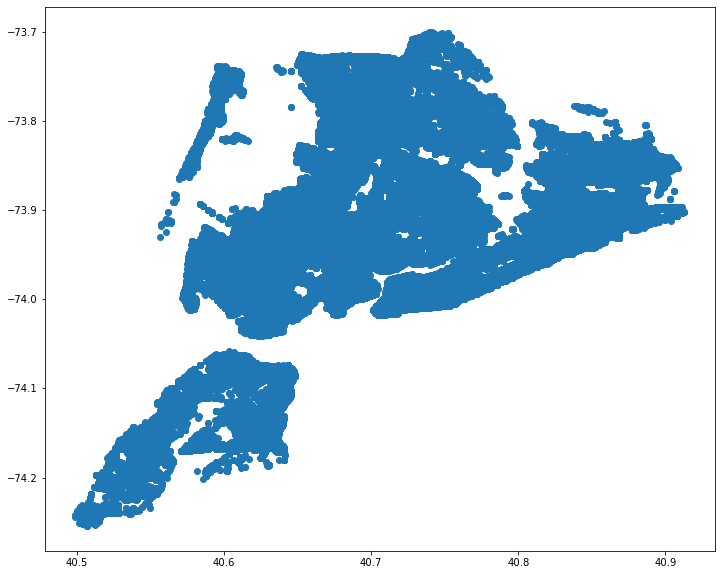

In [16]:
#try a basic figure 
plt.figure(figsize=(12,10))
plt.scatter(crime.Latitude, crime.Longitude)
plt.show()

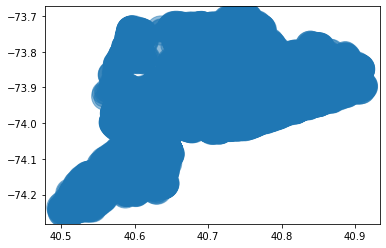

In [17]:
#try a bubble scatter plot
area = (30 * np.random.rand(731348))**2
plt.scatter(crime.Latitude, crime.Longitude, s=area, alpha=0.5)
plt.show()

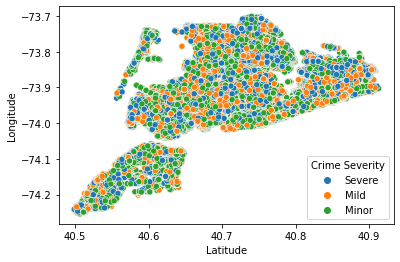

In [18]:
#let us try labeling
sns.scatterplot(data=crime, x=crime.Latitude, y=crime.Longitude, hue =crime['Crime Severity'])

Too many data points, so let us try one year.

(82617, 16)


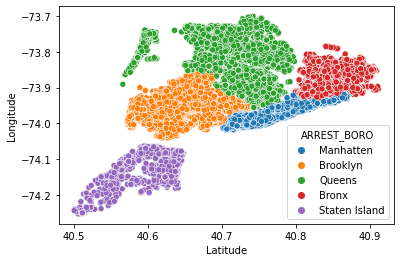

In [19]:
#Two requirements - year and law category
year_2019 = crime.loc[((crime['Year'] == 2019) & (crime['LAW_CAT_CD'] =='Felony'))]
print(year_2019.shape)

sns.scatterplot(data=year_2019, x=year_2019.Latitude, y=year_2019.Longitude, hue =year_2019.ARREST_BORO)

(17422, 16)


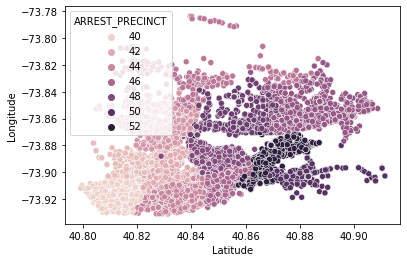

In [20]:
#Let us try 3 requirements - year, law category and borough
year_2019 = crime.loc[((crime['Year'] == 2019) & (crime['LAW_CAT_CD'] =='Felony') & (crime['ARREST_BORO'] =='Bronx'))]
print(year_2019.shape)
                       
sns.scatterplot(data=year_2019, x=year_2019.Latitude, y=year_2019.Longitude, hue =year_2019.ARREST_PRECINCT)

##### Other basic figures

<BarContainer object of 5 artists>

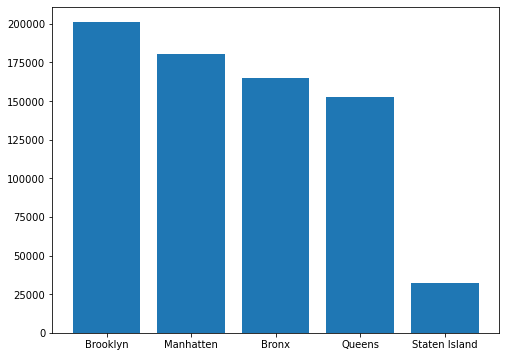

In [21]:
#Bar plot of number of offenses in each borrow
plt.figure(figsize=[8,6])
plt.bar(crime['ARREST_BORO'].value_counts().index.tolist(), crime['ARREST_BORO'].value_counts().values)

<BarContainer object of 4 artists>

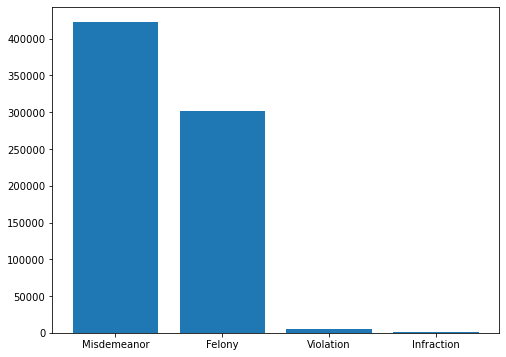

In [22]:
#Bar plot of differnt offense categories, maybe only focus on misdemeanors and felonies?
plt.figure(figsize=[8,6])
plt.bar(crime['LAW_CAT_CD'].value_counts().index.tolist(), crime['LAW_CAT_CD'].value_counts().values)

<BarContainer object of 12 artists>

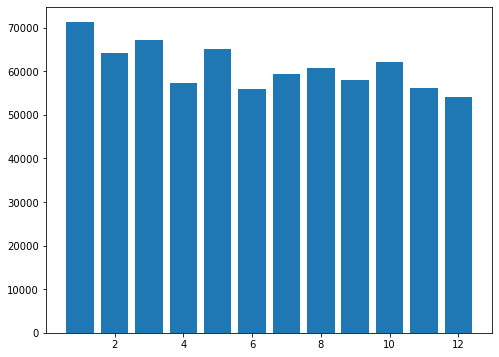

In [23]:
#Bar plot of the number of offenses in each month
plt.figure(figsize=[8,6])
plt.bar(crime['Month'].value_counts().index.tolist(), crime['Month'].value_counts().values)

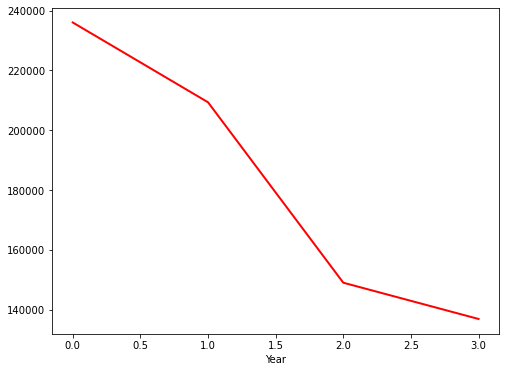

In [24]:
#Bar plot of number of offenses each year --- We have something
labs =['2018','2019','2020','2021']
plt.figure(figsize=[8,6])
plt.plot(crime['Year'].value_counts().values, color = 'red', lw = 2)
plt.xlabel('Year')
#plt.xticks(labels=labs)
plt.show()

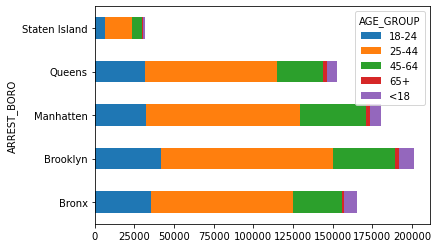

In [25]:
#Bar plot showing proportion of crimes committed per age group at each boro
pd.crosstab(crime['ARREST_BORO'],crime['AGE_GROUP']).plot(kind="barh",stacked=True)

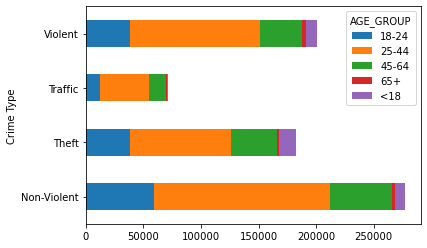

In [26]:
#Bar plot showing proportion of crimes committed per age group for each Crime Type
pd.crosstab(crime['Crime Type'],crime['AGE_GROUP']).plot(kind="barh",stacked=True)

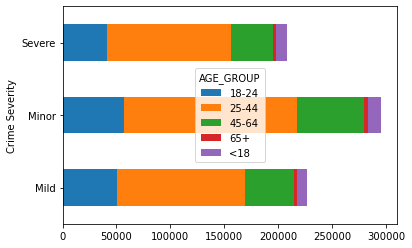

In [27]:
#Bar plot showing proportion of crimes committed per age group for crime severity
pd.crosstab(crime['Crime Severity'],crime['AGE_GROUP']).plot(kind="barh",stacked=True)

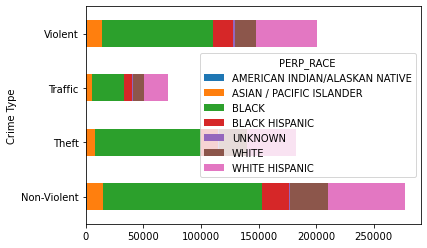

In [28]:
#Bar plot showing proportion of crimes committed per age group for each Crime Type
pd.crosstab(crime['Crime Type'],crime['PERP_RACE']).plot(kind="barh",stacked=True)

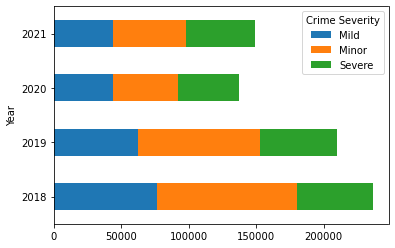

In [29]:
#Bar plot showing proportion of crimes committed per year for crime severity
pd.crosstab(crime['Year'],crime['Crime Severity']).plot(kind="barh",stacked=True)

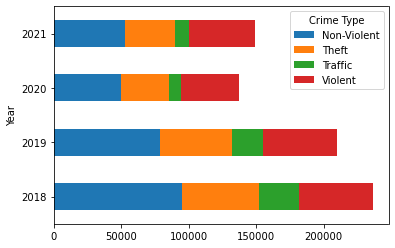

In [30]:
#Bar plot showing proportion of crimes committed per year per Crime type
pd.crosstab(crime['Year'],crime['Crime Type']).plot(kind="barh",stacked=True)

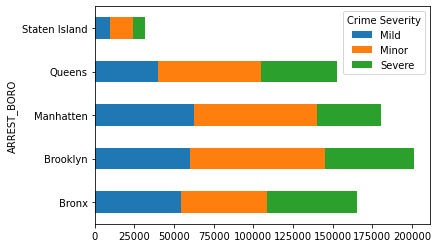

In [31]:
#Bar plot showing proportion of serious crimes committed in each boro
pd.crosstab(crime['ARREST_BORO'],crime['Crime Severity']).plot(kind="barh",stacked=True)

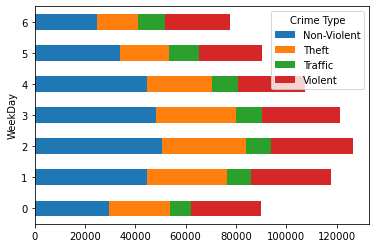

In [32]:
#Bar plot showing proportion of crimes committed per year per Crime type
pd.crosstab(crime['WeekDay'],crime['Crime Type']).plot(kind="barh",stacked=True)

### Note

There is something important to consider with years!

This quick EDA illustrated what we can start dropping and subsampling:

Drop: 
     
     1. the LAW_CAT_CD column adds no value
     2. remove unknown race
     3. remove age groups that have committed little crime (<18 and 65+)

Possible Subsamplings:

    1. Covid Waves (can be clusters?)
    2. By Borough
    3. By Precinct
    4. Crime Severity
    5. Crime Type
    6. Age Group
    7. Year or time period

In [33]:
#Frist drop the LAW_CAT_CD column
crime = crime.drop('LAW_CAT_CD', axis = 1)

#Drop all rows that have unknown Perp Race
crime = crime[crime['PERP_RACE'] != 'UNKNOWN']

#Drop ages <18 and 65+ - did not consitute large proportion of crimes
crime = crime[((crime['AGE_GROUP'] != '<18') & (crime['AGE_GROUP'] != '65+'))]

#check shape
crime.shape

(685440, 15)

Further feature engineering:
    
    Will focus on periods

We will be defining two time periods:
    
    1. Pre-Covid -> March 2019 - end of Feb 2020
    2. Covid -> March 2020 - end of Feb 2021

Drop: Weekday, Month, Week, Year, precinct and crime type (similar to severity).

Change Crime Severity and Age Group into ordinals

Change Perp sex, race Boro and race into dummies

In [34]:
crime.head()

,ARREST_DATE,WeekDay,Month,Week,Year,Crime Severity,Crime Type,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,New Georeferenced Column
0,2021-12-18,5,12,50,2021,Severe,Violent,Queens,105,18-24,M,BLACK,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
2,2021-10-14,3,10,41,2021,Severe,Violent,Brooklyn,61,25-44,M,WHITE,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
5,2021-09-27,0,9,39,2021,Severe,Violent,Brooklyn,84,25-44,M,BLACK,40.695469,-73.982825,POINT (-73.98282507899995 40.69546894100006)
7,2021-09-18,5,9,37,2021,Severe,Violent,Bronx,41,25-44,M,WHITE HISPANIC,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
8,2021-09-17,4,9,37,2021,Severe,Violent,Queens,105,25-44,M,BLACK,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)


First I am going to make a deep copy.

    One copy will only be ordinal variables
    
    The other will include dummy variables
    
3 dataframes of each, one master, one covid and one pre-covid

In [116]:
#First deepcopy and start prepping for dummy and ordinal variables
crime_db = copy.deepcopy(crime)

#Drop Weekday, month, week, year, precinct and crime type
crime_db = crime_db.drop(['WeekDay', 'Month', 'Week', 'Year', 'ARREST_PRECINCT', 'Crime Type'], axis=1)


#First change crime severity and age group into ordinals
crime_db = crime_db.replace({"Crime Severity" : {"Minor" : 0, "Mild" : 1, "Severe": 2},
                       "AGE_GROUP" : {"18-24" : 0, "25-44" : 1, "45-64":2} #youngest, middle, oldest ranking
                        })

#Get dummy variables for boro, sex, and race
crime_db = pd.get_dummies(crime_db, columns=['ARREST_BORO', 'PERP_SEX', 'PERP_RACE'], drop_first=True)

#See new table
crime_db.head()

,ARREST_DATE,Crime Severity,AGE_GROUP,Latitude,Longitude,New Georeferenced Column,ARREST_BORO_Brooklyn,ARREST_BORO_Manhatten,ARREST_BORO_Queens,ARREST_BORO_Staten Island,PERP_SEX_M,PERP_RACE_ASIAN / PACIFIC ISLANDER,PERP_RACE_BLACK,PERP_RACE_BLACK HISPANIC,PERP_RACE_WHITE,PERP_RACE_WHITE HISPANIC
0,2021-12-18,2,0,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002),0,0,1,0,1,0,1,0,0,0
2,2021-10-14,2,1,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005),1,0,0,0,1,0,0,0,1,0
5,2021-09-27,2,1,40.695469,-73.982825,POINT (-73.98282507899995 40.69546894100006),1,0,0,0,1,0,1,0,0,0
7,2021-09-18,2,1,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034),0,0,0,0,1,0,0,0,0,1
8,2021-09-17,2,1,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002),0,0,1,0,1,0,1,0,0,0


In [117]:
#Change arrest data order to month/day/year
crime_db['ARREST_DATE'] = crime_db['ARREST_DATE'].dt.strftime('%m/%d/%Y')

#The above turned it into an onject, turn back to datetime object
crime_db['ARREST_DATE'] = pd.to_datetime(crime_db['ARREST_DATE'])

#Use ARREST DATE to create 2 DFs and merge for correct periods
pre_covid_db = crime_db.loc[(crime_db['ARREST_DATE'] >= '03/01/2019') & (crime_db['ARREST_DATE'] <= '02/29/2020')]
covid_db = crime_db.loc[(crime_db['ARREST_DATE'] >= '03/01/2020') & (crime_db['ARREST_DATE'] <= '02/28/2021')]

#Merge
new_crime_db = pd.concat([pre_covid_db, covid_db], axis = 0)

#check shape and view
print("Shape of new_crime:", new_crime_db.shape)
print("Shape of covid:", covid_db.shape)
print("Shape of pre_covid",pre_covid_db.shape)

new_crime_db.head()

Shape of new_crime: (312181, 16)
Shape of covid: (122873, 16)
Shape of pre_covid (189308, 16)


,ARREST_DATE,Crime Severity,AGE_GROUP,Latitude,Longitude,New Georeferenced Column,ARREST_BORO_Brooklyn,ARREST_BORO_Manhatten,ARREST_BORO_Queens,ARREST_BORO_Staten Island,PERP_SEX_M,PERP_RACE_ASIAN / PACIFIC ISLANDER,PERP_RACE_BLACK,PERP_RACE_BLACK HISPANIC,PERP_RACE_WHITE,PERP_RACE_WHITE HISPANIC
7,2019-04-23,2,2,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008),1,0,0,0,1,0,0,1,0,0
8,2019-05-04,2,1,40.883383,-73.902333,POINT (-73.90233330899997 40.88338257900006),0,0,0,0,1,0,1,0,0,0
9,2019-05-23,2,2,40.814850,-73.956682,POINT (-73.95668184799996 40.81485028900005),0,1,0,0,0,0,1,0,0,0
13,2019-07-16,2,2,40.675492,-73.800926,POINT (-73.80092613699998 40.67549172900004),0,0,1,0,1,0,1,0,0,0
18,2019-08-14,2,1,40.789348,-73.947352,POINT (-73.94735241299998 40.78934789300007),0,1,0,0,1,0,1,0,0,0


In [119]:
#chronilogical order for arrest date
new_crime_db = new_crime_db.sort_values('ARREST_DATE').reset_index(drop=True)
covid_db = covid_db.sort_values('ARREST_DATE').reset_index(drop=True)
pre_covid_db = pre_covid_db.sort_values('ARREST_DATE').reset_index(drop=True)

In [121]:
#Save new crime dataframe to csv file in Data folder
new_crime_db.to_csv('Data/Crime_data/crime_master.csv')

#Save covid and pre_covid as their own csv files
covid_db.to_csv('Data/Crime_data/covid_crime.csv')
pre_covid_db.to_csv('Data/Crime_data/pre_covid_crime.csv')

#### Dataframe with only ordinals

In [123]:
#First deepcopy and start prepping for dummy and ordinal variables
crime_2 = copy.deepcopy(crime)

#Drop Weekday, month, week, year, precinct and crime type
crime_2 = crime_2.drop(['WeekDay', 'Month', 'Week', 'Year', 'Crime Type'], axis=1)


#First change crime severity and age group into ordinals
crime_2 = crime_2.replace({"Crime Severity" : {"Minor" : 0, "Mild" : 1, "Severe": 2},
                             "AGE_GROUP" : {"18-24" : 0, "25-44" : 1, "45-64":2}, #youngest, middle, oldest ranking
                            "ARREST_BORO" : {"Bronx":0, "Brooklyn":1, "Manhatten":2, "Queens":3, "Staten Island":4},
                            "PERP_SEX" : {"F":0, "M":1},
                            "PERP_RACE" : {"AMERICAN INDIAN/ALASKAN NATIVE":0, "ASIAN / PACIFIC ISLANDER":1,
                                          "BLACK":2, "BLACK HISPANIC":3, "WHITE":4, "WHITE HISPANIC":5}
                          })
#See new table
crime_2.head()

,ARREST_DATE,Crime Severity,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,New Georeferenced Column
0,2021-12-18,2,3,105,0,1,2,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
2,2021-10-14,2,1,61,1,1,4,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
5,2021-09-27,2,1,84,1,1,2,40.695469,-73.982825,POINT (-73.98282507899995 40.69546894100006)
7,2021-09-18,2,0,41,1,1,5,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
8,2021-09-17,2,3,105,1,1,2,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)


In [112]:
#Change arrest data order to month/day/year
crime_2['ARREST_DATE'] = crime_2['ARREST_DATE'].dt.strftime('%m/%d/%Y')

#The above turned it into an onject, turn back to datetime object
crime_2['ARREST_DATE'] = pd.to_datetime(crime_2['ARREST_DATE'])

#Use ARREST DATE to create 2 DFs and merge for correct periods
pre_covid_2 = crime_2.loc[(crime_2['ARREST_DATE'] >= '03/01/2019') & (crime_2['ARREST_DATE'] <= '02/29/2020')]
covid_2 = crime_2.loc[(crime_2['ARREST_DATE'] >= '03/01/2020') & (crime_2['ARREST_DATE'] <= '02/28/2021')]

#Merge
new_crime_2 = pd.concat([pre_covid_2, covid_2], axis = 0)

#check shape and view
print("Shape of new_crime:", new_crime_2.shape)
print("Shape of covid:", covid_2.shape)
print("Shape of pre_covid",pre_covid_2.shape)

new_crime_2.head()

Shape of new_crime: (312181, 10)
Shape of covid: (122873, 10)
Shape of pre_covid (189308, 10)


,ARREST_DATE,Crime Severity,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,New Georeferenced Column
7,2019-04-23,2,1,77,2,1,3,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
8,2019-05-04,2,0,50,1,1,2,40.883383,-73.902333,POINT (-73.90233330899997 40.88338257900006)
9,2019-05-23,2,2,26,2,0,2,40.814850,-73.956682,POINT (-73.95668184799996 40.81485028900005)
13,2019-07-16,2,3,113,2,1,2,40.675492,-73.800926,POINT (-73.80092613699998 40.67549172900004)
18,2019-08-14,2,2,23,1,1,2,40.789348,-73.947352,POINT (-73.94735241299998 40.78934789300007)


In [124]:
#chronilogical order for arrest date
new_crime_2 = new_crime_2.sort_values('ARREST_DATE').reset_index(drop=True)
covid_2 = covid_2.sort_values('ARREST_DATE').reset_index(drop=True)
pre_covid_2 = pre_covid_2.sort_values('ARREST_DATE').reset_index(drop=True)

#Save new crime dataframe to csv file in Data folder
new_crime_2.to_csv('Data/Crime_data/Other/crime_master_2.csv')

#Save covid and pre_covid as their own csv files
covid_2.to_csv('Data/Crime_data/Other/c_crime_2.csv')
pre_covid_2.to_csv('Data/Crime_data/Other/pre_c_crime_2.csv')

### Trying some mapping

In [107]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [109]:
year_2019 = crime.loc[(crime['ARREST_DATE'] <= '2020-02-28') & (crime['ARREST_DATE'] >= '2020-01-01')]
print(year_2019.shape)

#change the  geo column to geo series
year_2019['geometry'] = gpd.GeoSeries.from_wkt(year_2019['New Georeferenced Column'])
test = gpd.GeoDataFrame(year_2019, geometry='geometry')

(28375, 15)


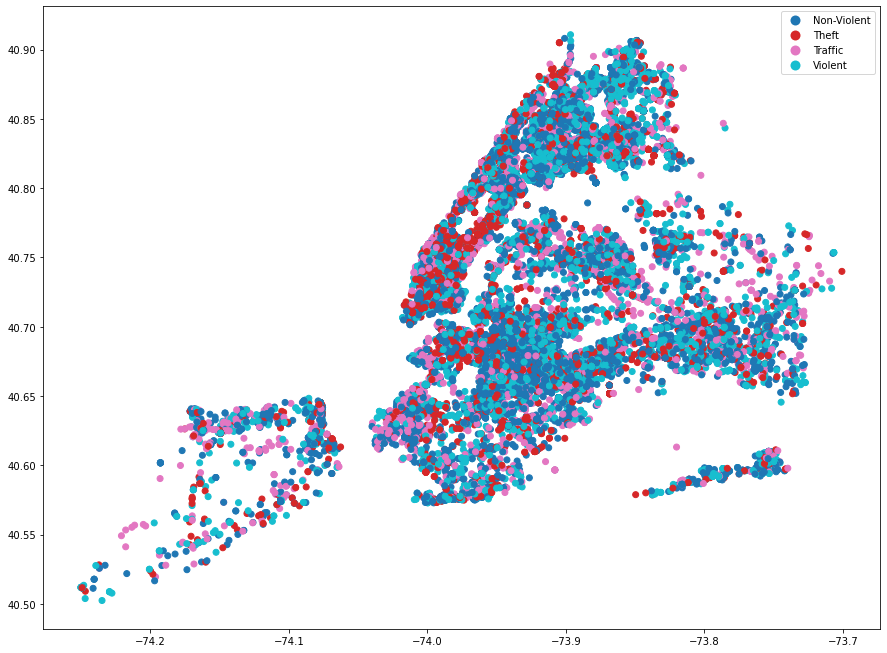

In [110]:
# create figure and axes
fig, ax = plt.subplots(figsize = (15,12))


# create map from world_filtered data-frame
test.plot(column = "Crime Type", categorical = True, ax =ax, legend = True)


plt.show()